In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
train = pd.read_csv(r'E:\KAGGLE\train.csv')
test = pd.read_csv(r'E:\KAGGLE\test.csv')

In [3]:
train.info()
print '----------'
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non

## PassengerId 

PassengerId 这列没有多大利用价值，drop掉。

In [4]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

# Pclass

In [5]:
train.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [6]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

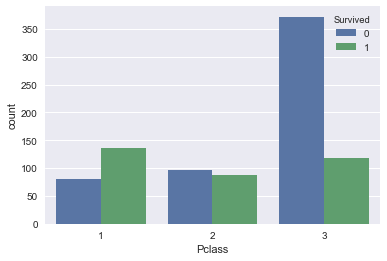

In [7]:
sns.countplot(x='Pclass',hue='Survived',data = train)

In [8]:
train[['Pclass_1','Pclass_2','Pclass_3']]=pd.get_dummies(train['Pclass'],columns=[['Pclass_1','Pclass_2','Pclass_2']])

In [9]:
test[['Pclass_1','Pclass_2','Pclass_3']]=pd.get_dummies(test['Pclass'],columns=[['Pclass_1','Pclass_2','Pclass_2']])

该列数据完整，且对结果影响较大，可以直接做get_dummies处理。

# Name

Name列做两种处理，1：筛选出人物的称号name_title（mr,mrs,ms,dr,等）；2：名字长度Name_len。

In [10]:
def Name(train,test):
    for i in [train,test]:
        i['Name_title'] = i['Name'].apply(lambda x: str(x).split(',')[1]).apply(lambda x:str(x).split('.')[0])
        i['Name_len'] = pd.qcut(i['Name'].apply(lambda x:str(x)).apply(lambda x:len(x)),5)
        del i['Name']
    return train,test

# Sex

Sex列对结果影响显著，且无残缺数据，直接get dummis处理。

In [11]:
def Sex(train,test):
    for i in [train,test]:
        i = pd.concat((i,pd.get_dummies(i['Sex'])),axis=1)
        del i['Sex']
    return train,test

In [12]:
train = pd.concat((train,pd.get_dummies(train['Sex'])),axis=1)

In [13]:
test = pd.concat((test,pd.get_dummies(test['Sex'])),axis=1)

In [14]:
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

#    

# Age

Age有少部分缺失值，先看null对结果是不是有显著影响  

In [15]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [16]:
pd.qcut(train['Age'],5).value_counts()

[0.42, 19]    164
(31.8, 41]    144
(41, 80]      142
(19, 25]      137
(25, 31.8]    127
Name: Age, dtype: int64

In [17]:
train['Age_statue'] = pd.qcut(train['Age'],5)

In [18]:
test['Age_statue'] = pd.qcut(test['Age'],5)

In [19]:
train = pd.concat((train,pd.get_dummies(train['Age_statue'])),axis=1)

In [20]:
test= pd.concat((test,pd.get_dummies(test['Age_statue'])),axis=1)

In [28]:
train.info()
print '----------'
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         204 non-null object
Embarked      889 non-null object
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
female        891 non-null uint8
male          891 non-null uint8
Age_statue    714 non-null category
[0.42, 19]    891 non-null uint8
(19, 25]      891 non-null uint8
(25, 31.8]    891 non-null uint8
(31.8, 41]    891 non-null uint8
(41, 80]      891 non-null uint8
Big           891 non-null uint8
Middle        891 non-null uint8
Solo          891 non-null uint8
dtypes: category(1), float64(2), int64(4), object(4), uint8(13)
memory usage: 81.9+ KB
-----

# Sibsp

In [22]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [25]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [26]:
train['Family_size'] = np.where((train['SibSp']+train['Parch'])==0,'Solo',np.where((train['SibSp']+train['Parch'])<=3,'Middle','Big'))

In [27]:
train = pd.concat((train,pd.get_dummies(train['Family_size'])),axis=1)
test['Family_size'] = np.where((test['SibSp']+test['Parch'])==0,'Solo',np.where((test['SibSp']+test['Parch'])<=3,'Middle','Big'))
test= pd.concat((test,pd.get_dummies(test['Family_size'])),axis=1)
train.drop(['Family_size'],axis=1,inplace=True)
test.drop(['Family_size'],axis=1,inplace=True)

# Ticket

同name，分解成ticket_len和ticket_lett。

In [29]:
train['Ticket_len'] = train.Ticket.apply(lambda x:len(x))

In [30]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [31]:
train['Ticket_lett'] = train.Ticket.apply(lambda x:str(x)[0])

In [33]:
test['Ticket_len'] = test.Ticket.apply(lambda x:len(x))
test['Ticket_lett'] = test.Ticket.apply(lambda x:str(x)[0])

# Fare

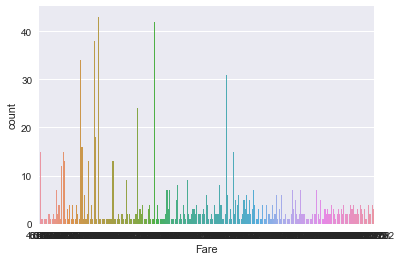

In [35]:
sns.countplot('Fare',data = train)

In [36]:
train['Fare_cut'] = pd.qcut(train['Fare'],4)

In [57]:
train['Fare_cut'].value_counts()

(7.91, 14.454]    224
[0, 7.91]         223
(31, 512.329]     222
(14.454, 31]      222
Name: Fare_cut, dtype: int64

In [55]:
print list(train.columns)
print list(test.columns)

['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'female', 'male', 'Age_statue', '[0.42, 19]', '(19, 25]', '(25, 31.8]', '(31.8, 41]', '(41, 80]', 'Big', 'Middle', 'Solo', 'Ticket_len', 'Ticket_lett', 'Fare_cut', 'Cabin_num', 'Cabin_catgy', 'Cabin_letter']
['Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'female', 'male', 'Age_statue', '[0.17, 20]', '(20, 25]', '(25, 30]', '(30, 42]', '(42, 76]', 'Big', 'Middle', 'Solo', 'Ticket_len', 'Ticket_lett', 'Fare_cut']


In [37]:
test['Fare_cut'] = pd.qcut(test['Fare'],4)

In [50]:
train.info()
print '----------------------'
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Pclass_1        891 non-null uint8
Pclass_2        891 non-null uint8
Pclass_3        891 non-null uint8
female          891 non-null uint8
male            891 non-null uint8
Age_statue      714 non-null category
[0.42, 19]      891 non-null uint8
(19, 25]        891 non-null uint8
(25, 31.8]      891 non-null uint8
(31.8, 41]      891 non-null uint8
(41, 80]        891 non-null uint8
Big             891 non-null uint8
Middle          891 non-null uint8
Solo            891 non-null uint8
Ticket_len      891 non-null int64
Ticket_le

# Cabin

Cabin_letter,Cabin_len

In [43]:
train['Cabin_catgy'] = train.Cabin.apply(lambda x:str(x).split(' ')[-1][1:]).replace('an',np.NaN)

In [44]:
train['Cabin_catgy']= train['Cabin_num'].apply(lambda x:int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [45]:
train['Cabin_catgy'] = pd.qcut(train['Cabin_catgy'],5)

In [46]:
train['Cabin_catgy'].value_counts()

(19.8, 33]     41
(85.2, 148]    40
(33, 52]       40
[2, 19.8]      40
(52, 85.2]     39
Name: Cabin_catgy, dtype: int64

In [47]:
train['Cabin_letter'] = train['Cabin'].apply(lambda x:str(x).split(' ')[-1][0])

In [48]:
train['Cabin_letter'].value_counts()

n    687
C     59
B     47
D     33
E     33
A     15
F      9
G      7
T      1
Name: Cabin_letter, dtype: int64

# Embarked

In [125]:
train.Embarked.fillna('S',inplace=True)

In [127]:
train.Embarked.isnull().sum()

0

# Feature Engineering

In [131]:
len(train.columns)

21